In [5]:
!wget http://transfer.sh/cNIAS/train%281%29.csv

--2021-03-03 19:41:53--  http://transfer.sh/cNIAS/train%281%29.csv
Resolving transfer.sh (transfer.sh)... 144.76.136.153
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98628550 (94M) [text/csv]
Saving to: ‘train(1).csv’

train(1).csv        100%[===================>]  94.06M  18.4MB/s    in 5.4s    

2021-03-03 19:42:00 (17.5 MB/s) - ‘train(1).csv’ saved [98628550/98628550]



In [6]:
import pandas as pd
df=pd.read_csv('train(1).csv')
df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [191]:
df.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
import seaborn as sns

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


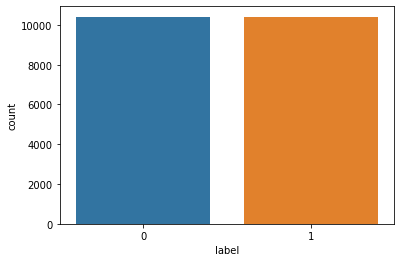

In [10]:
#sns.pairplot(df,hue="label")


sns.countplot(df["label"])

In [11]:
df=df.dropna()

In [12]:
df.reset_index(inplace=True)

In [13]:
df.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [15]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z]',' ',df['title'][i])
    review=review.lower()
    review=review.split()
    words = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(words)   
    corpus.append(review)



In [16]:
import numpy as np

y=np.array(df['label'])

In [17]:
from keras.preprocessing.text import Tokenizer,one_hot


In [18]:
token=Tokenizer()
token.fit_on_texts(corpus)

In [19]:
x_t=np.array(token.texts_to_sequences(corpus))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
x_t[0:10]

array([list([31, 221, 243, 50, 142, 102, 509, 1775, 3009, 420]),
       list([828, 6, 7, 110, 150, 1090, 5]), list([335, 855, 33, 83]),
       list([567, 34, 1157, 20, 887, 1682]),
       list([1187, 150, 597, 3305, 7839, 253, 150, 1459, 135, 7840]),
       list([3306, 3010, 339, 162, 278, 4, 195, 132, 323, 1242, 2109, 1298, 244, 15, 5]),
       list([5912, 5913, 49, 379, 2387, 128, 167, 856, 1, 3, 2]),
       list([54, 1393, 39, 1091, 18, 5914, 4, 1158, 1, 3, 2]),
       list([12, 911, 586, 2110, 271, 336, 7841, 1299, 4, 857]),
       list([1188, 1871, 4838, 178, 5915, 96, 432, 1159])], dtype=object)

In [ ]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [ ]:
corpus

In [20]:
one_hott=[one_hot(words,5000)for words in corpus] 

In [ ]:
type(corpus)

list

In [ ]:
type(one_hott)

list

In [21]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset ,DataLoader
device = torch.device("cuda")

In [ ]:
device

device(type='cuda')

In [ ]:
torch.cuda.memory_cached()

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:346: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


0

In [ ]:
torch.cuda.get_device_name()

'Tesla T4'

In [22]:
len_one_hot=np.array([len(a) for a in one_hott])
len_one_hot

array([10,  7,  4, ..., 10,  6,  3])

In [23]:
 np.amax(len_one_hot)

47

In [24]:
one_hott[0]

[3792, 4475, 440, 130, 4325, 4900, 4378, 2504, 1865, 4342]

In [25]:


# store length of each element in an array
len_a = np.array([len(a) for a in one_hott]) 
variable_a  = np.zeros((len(len_a), np.amax(len_a)))
for i, a in enumerate(one_hott):
    variable_a[i, 0:len(a)] = a

vocab_size = len(np.unique(variable_a))
x_torch=Variable(torch.from_numpy(variable_a).long()).cuda()
print(variable_a)


[[3792. 4475.  440. ...    0.    0.    0.]
 [1797.  944. 2993. ...    0.    0.    0.]
 [4622. 3234. 2320. ...    0.    0.    0.]
 ...
 [ 182. 2258. 3990. ...    0.    0.    0.]
 [1286. 3970.  363. ...    0.    0.    0.]
 [1133. 3212. 2269. ...    0.    0.    0.]]


In [26]:
vocab_size

4712

In [27]:
Y=torch.LongTensor(y).cuda()

In [192]:
num=[]
t=14628
te=3657
for i in range (1,14629):
  if t % i ==0 and te % i == 0:
    num.append(i)
print("numbers that can be batch size:",num)

numbers that can be batch size: [1, 3, 23, 53, 69, 159, 1219, 3657]


In [149]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_torch,Y,test_size=0.2,random_state=0)

In [150]:
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_test,y_test)

In [166]:
batch_size = 159
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)

In [167]:
train_loader

In [168]:


class emb_model(nn.Module):
    def __init__(self,input_features=40,voc_size=5000,feature=400,n_layers=2,lstm=100,out_features=1):
        super().__init__()
        self.n_layers=n_layers
        self.input_features=input_features
        self.lstm=lstm
        self.emb=nn.Embedding(voc_size,feature)
        self.f_connected1=nn.LSTM(feature,lstm,n_layers,dropout=0.5,batch_first=True)
        self.outt=nn.Linear(lstm,out_features)
        self.sig=nn.Sigmoid()
    def forward(self,x,hidden):
        batch_size=x.size(0)
        x=x.long()
        out=self.emb(x)
        lstm_out, hidden = self.f_connected1(out, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.lstm)
        out=self.outt(lstm_out)
        out=self.sig(out)
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.lstm).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.lstm).zero_().to(device))
        return hidden

In [169]:
####instantiate my ANN_model
torch.manual_seed(20)
model=emb_model()
model=model.cuda()

In [170]:
model.parameters

<bound method Module.parameters of emb_model(
  (emb): Embedding(5000, 400)
  (f_connected1): LSTM(400, 100, num_layers=2, batch_first=True, dropout=0.5)
  (outt): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)>

In [171]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()

criterion = nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [172]:
model.train()   # setting the mode to train....

emb_model(
  (emb): Embedding(5000, 400)
  (f_connected1): LSTM(400, 100, num_layers=2, batch_first=True, dropout=0.5)
  (outt): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [173]:
for i,j in train_loader:
  print("here direct value   :  ",i)
  print("here the input.shape",i.shape)
  print("here the label.float()",j.shape)
  print("here the input.float()",i.squeeze())
  break

here direct value   :   tensor([[2138, 3727, 4692,  ...,    0,    0,    0],
        [1793, 1168, 4575,  ...,    0,    0,    0],
        [1117, 1419, 4263,  ...,    0,    0,    0],
        ...,
        [1033,  498, 2250,  ...,    0,    0,    0],
        [4238, 4987,  943,  ...,    0,    0,    0],
        [ 727, 2779,  792,  ...,    0,    0,    0]], device='cuda:0')
here the input.shape torch.Size([159, 47])
here the label.float() torch.Size([159])
here the input.float() tensor([[2138, 3727, 4692,  ...,    0,    0,    0],
        [1793, 1168, 4575,  ...,    0,    0,    0],
        [1117, 1419, 4263,  ...,    0,    0,    0],
        ...,
        [1033,  498, 2250,  ...,    0,    0,    0],
        [4238, 4987,  943,  ...,    0,    0,    0],
        [ 727, 2779,  792,  ...,    0,    0,    0]], device='cuda:0')


In [185]:
epochs = 10
counter = 0
print_every = 1000
clip = 5
valid_loss_min = np.Inf

accuracy_w=[]
loss_w=[]
val_accuracy_w=[]
val_loss_w=[]

model.train()
for i in range(epochs):
    h = model.init_hidden(batch_size)
    val_crr=0
    crr=0
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        pred1 = torch.round(output.squeeze())  # Rounds the output to 0/1
        correct_tensor1 = pred1.eq(labels.float().view_as(pred1))
        correct1 = np.squeeze(correct_tensor1.cpu().numpy())
        crr += np.sum(correct1)
    val_h = model.init_hidden(batch_size)
    val_losses = []
    model.eval()
    for inp, lab in val_loader:
      val_h = tuple([each.data for each in val_h])
      inp, lab = inp.to(device), lab.to(device)
      out, val_h = model(inp, val_h)
      val_loss = criterion(out.squeeze(), lab.float())
      val_losses.append(val_loss.item())
      pred = torch.round(out.squeeze())  # Rounds the output to 0/1
      correct_tensor = pred.eq(lab.float().view_as(pred))
      correct = np.squeeze(correct_tensor.cpu().numpy())
      val_crr += np.sum(correct)

    model.train()
    p=(crr/len(train_loader.dataset))*100
    p_loss=loss.item()
    q=(val_crr/len(val_loader.dataset))*100
    q_loss=np.mean(val_losses)
    accuracy_w.append(p)
    loss_w.append(p_loss)
    val_accuracy_w.append(q)
    val_loss_w.append(q_loss)
    print("Epoch: {}/{}...".format(i+1, epochs),
    "Step: {}...".format(counter),
    "Loss: {:.6f}...".format(p_loss),
    "acc: {:.6f}...".format(p),
    "Val Loss: {:.6f}".format(q_loss),
    "Val acc: {:.6f}".format(q))
    if np.mean(val_losses) <= valid_loss_min:
      torch.save(model.state_dict(), './state_dict.pt')
      print('\nValidation loss decreased ({:.6f} --> {:.6f}).  Saving model ...\n'.format(valid_loss_min,np.mean(val_losses)))
      valid_loss_min = np.mean(val_losses)

Epoch: 1/10... Step: 92... Loss: 0.213575... acc: 95.754717... Val Loss: 0.262710 Val acc: 91.030900

Validation loss decreased (inf --> 0.262710).  Saving model ...

Epoch: 2/10... Step: 184... Loss: 0.071612... acc: 97.286027... Val Loss: 0.268500 Val acc: 91.222313
Epoch: 3/10... Step: 276... Loss: 0.048348... acc: 98.024337... Val Loss: 0.306330 Val acc: 91.058244
Epoch: 4/10... Step: 368... Loss: 0.029140... acc: 98.427673... Val Loss: 0.316650 Val acc: 91.222313
Epoch: 5/10... Step: 460... Loss: 0.141629... acc: 98.660104... Val Loss: 0.330357 Val acc: 91.304348
Epoch: 6/10... Step: 552... Loss: 0.045924... acc: 98.707957... Val Loss: 0.328413 Val acc: 90.894176
Epoch: 7/10... Step: 644... Loss: 0.130374... acc: 98.653268... Val Loss: 0.304099 Val acc: 90.784796
Epoch: 8/10... Step: 736... Loss: 0.107619... acc: 98.748975... Val Loss: 0.350194 Val acc: 90.730107
Epoch: 9/10... Step: 828... Loss: 0.035060... acc: 98.878862... Val Loss: 0.365683 Val acc: 90.866831
Epoch: 10/10... S

In [181]:
loss

tensor(0.2266, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

In [186]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

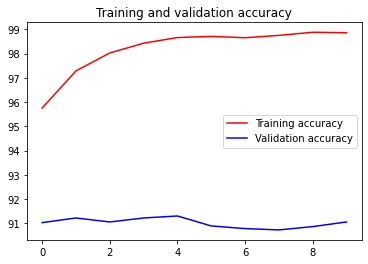

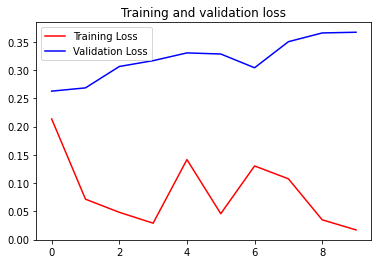

In [190]:
import matplotlib.pyplot as plt



epoch = range(epochs)

plt.plot(epoch, accuracy_w, 'r', label='Training accuracy')
plt.plot(epoch, val_accuracy_w, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epoch, loss_w, 'r', label='Training Loss')
plt.plot(epoch, val_loss_w, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()